# Plot estimate from the algorithm $\hat{\theta}$ vs true $\theta^*$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math, time
from functions_queueing_system import *
from functions_extremum_seeking import *
import random

In [2]:
seed_val=2
np.random.seed(seed_val)
random.seed(seed_val)

In [3]:
M = 100
K = 50
T = 50000*2
# dep_rate=0.7
dep_rate = [0.3, 0.6]
eps = 0.5
gamma = 0.1
alpha = 0.8
beta = 0.7
avg_over = 100

In [6]:
random.seed(0)
np.random.seed(0)
tic = time.time()
temp = estimate_theta_es(0.1, theta_star=0.4, M=M, K=K, T=T,\
                                              alpha=alpha, beta=beta, gamma=gamma, eps=eps, dep_rate=dep_rate)
toc = time.time()
print(f"{toc-tic}s")

40.635353326797485s


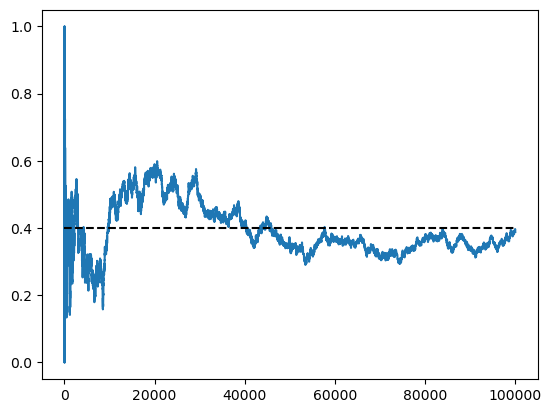

In [7]:
plt.plot(temp['theta_hat_t'])
plt.hlines(0.4, 0, T, linestyles='dashed', colors='k')

# Test performance on multiple runs

In [8]:
num_true_vals = 20
num_init_vals = 5
# theta_init_all = np.linspace(1e-3, 1-1e-3, num=num_init_vals)
theta_init_all = np.random.rand(num_init_vals)
results_all = [[None]*num_init_vals for _ in range(num_true_vals)] #made a change to save results properly, need to run it at some point (do it in the evening today)
theta_hat_t_all = np.zeros((T, num_init_vals, num_true_vals))
theta_hat_mean_all = np.zeros((num_true_vals,))
theta_star_all = np.linspace(1e-3, 1-1e-3, num=num_true_vals)

In [9]:
random.seed(0)
np.random.seed(0)

tic = time.time()
for j in range(num_true_vals):
    theta_star_j = theta_star_all[j]
    for i in range(num_init_vals):
        results_all[j][i] = estimate_theta_es(theta_init_all[i], theta_star=theta_star_j, M=M, K=K, T=T,\
                                              alpha=alpha, beta=beta, gamma=gamma, eps=eps, dep_rate=dep_rate)
        theta_hat_t_all[:,i,j] = results_all[j][i]['theta_hat_t']
    print(f"theta_star={theta_star_j} done")
    theta_hat_mean_all[j] = np.mean(np.mean(theta_hat_t_all[-avg_over:,:,j], axis=0)) #average over the last 200 steps
toc = time.time()
print(f"time={toc-tic}s")

theta_star=0.001 done
theta_star=0.053526315789473686 done
theta_star=0.10605263157894737 done
theta_star=0.15857894736842104 done
theta_star=0.21110526315789474 done
theta_star=0.26363157894736844 done
theta_star=0.3161578947368421 done
theta_star=0.3686842105263158 done
theta_star=0.4212105263157895 done
theta_star=0.4737368421052632 done
theta_star=0.5262631578947369 done
theta_star=0.5787894736842105 done
theta_star=0.6313157894736842 done
theta_star=0.6838421052631579 done
theta_star=0.7363684210526316 done
theta_star=0.7888947368421053 done
theta_star=0.841421052631579 done
theta_star=0.8939473684210526 done
theta_star=0.9464736842105264 done
theta_star=0.999 done
time=5223.735536813736s


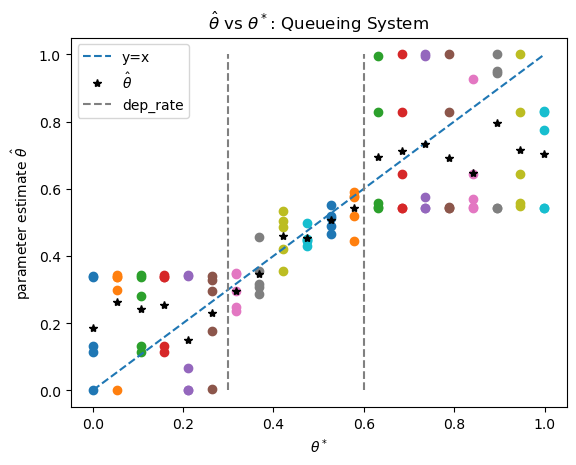

In [10]:
for j in range(num_true_vals):
    plt.scatter([theta_star_all[j]]*num_init_vals, np.mean(theta_hat_t_all[-avg_over:,:,j], axis=0))
plt.plot(theta_star_all, theta_star_all, '--', label="y=x")
plt.plot(theta_star_all, theta_hat_mean_all, 'k*', label=r"$\hat{\theta}$")
plt.xlabel(r"$\theta^*$")
plt.vlines(dep_rate, 0, 1, linestyles='dashed', label="dep_rate", colors='gray')
plt.ylabel(r"parameter estimate $\hat{\theta}$")
plt.title(r"$\hat{\theta}$ vs $\theta^*$: Queueing System")
plt.legend()

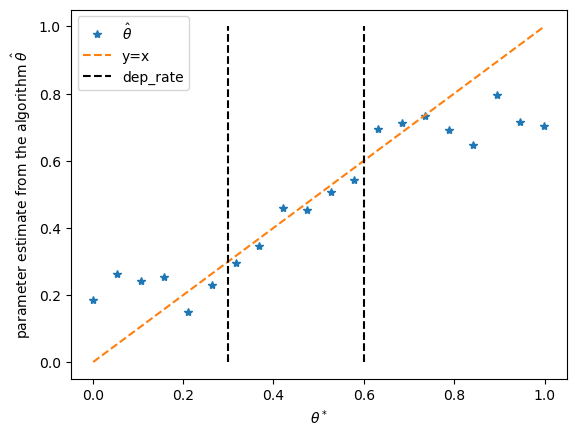

In [11]:
plt.plot(theta_star_all, theta_hat_mean_all, '*', label=r"$\hat{\theta}$")
plt.plot(theta_star_all, theta_star_all, '--', label="y=x")
plt.vlines(dep_rate, 0, 1, linestyles='dashed', label="dep_rate", colors='k')
plt.xlabel(r"$\theta^*$")
plt.ylabel(r"parameter estimate from the algorithm $\hat{\theta}$")
plt.legend()

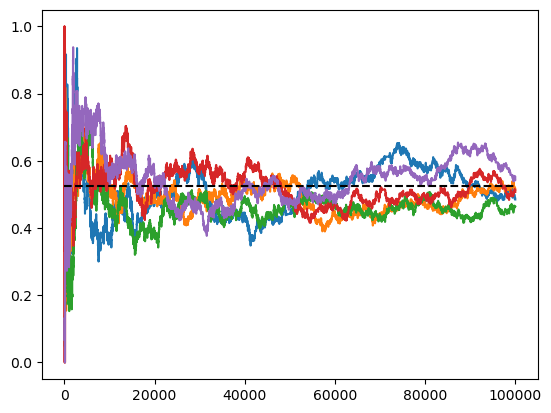

In [12]:
k = 10
for i in range(num_init_vals):
    plt.plot(theta_hat_t_all[:,i,k])
plt.hlines(theta_star_all[k], 0, T, linestyles='dashed', colors='k')

Text(0.5, 0, 'time t')

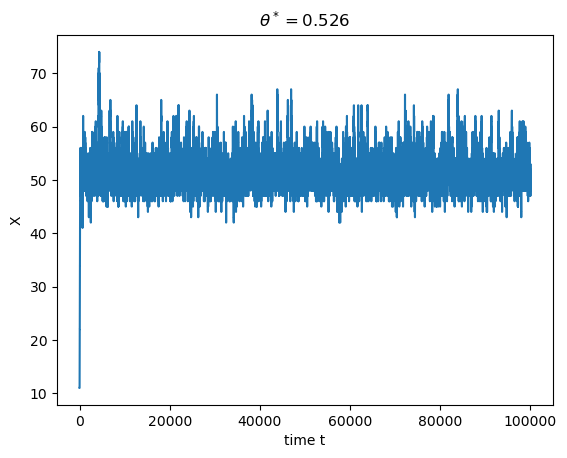

In [13]:
k = 10
plt.plot(results_all[k][i]['X'])
plt.title(r"$\theta^*=$"+str(round(theta_star_all[k], 3)))
plt.ylabel("X")
plt.xlabel("time t")

In [14]:
np.savez('./results/algo_ performance_qs_more_var_smaller_band2.npz', M=M, K=K, T=T, \
         dep_rate=dep_rate, eps=eps, gamma=gamma, alpha=alpha, beta=beta, avg_over=avg_over,\
        num_init_vals= num_init_vals, num_true_vals=num_true_vals, theta_init_all=theta_init_all, \
        results_all=results_all, theta_hat_t_all=theta_hat_t_all, theta_hat_mean_all=theta_hat_mean_all,\
        theta_star_all=theta_star_all)